# Overview

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?

H0 - There has been no difference in network latency since switching internet service providers.
Ha - There is a noticeable increase in network latency since switching ISPs.

True Positive - We are confident that there is a noticeable increase in network latency (and there is a network latency)
True Negative - We fail to reject the null hypothesis (and there is no actual difference in latency)
Type I Error - We are confident that there is a noticeable increase in network latency (but there isn't actually)
Type II Error - We fail to reject the null hypothesis (but there was an actual difference/increase in latency).

Is the website redesign any good?

H0 - There has been no difference in website traffic since the website redesign was deployed.
Ha - There has been an increase in website traffic since the website redesign was deployed.

True Positive - We are confident that there is an increase in website traffice since the redesign was deployed (and there is an actual increase in traffic).
True Negative - We fail to reject the null hypothesis (and there is no actual difference in website traffic).
Type I Error - We are confident that there is an increase (but there wasn't actually a difference)
Type II Error - We fail to reject the null hypothesis (but there actually was a difference in website traffic).

Is our television ad driving more sales?

H0 - There has been no difference in sales since the television ad was aired.
Ha - There has been an increase in sales since the television ad was aired.

True Positive - We are confident that there is an increase in sales since the ad was aired (and there is an increase in sales since ad was aired).
True Negative - We fail to reject the null hypothesis (and there is no actual difference in sales since it was aired).
Type I Error - We are confident that there is an increase in sales (but there wasn't actually a difference). 
Type II Error - We fail to reject the null hypothesis (but there was a difference/increase since it aired).

# Comparison of Means

1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?

> One-Sample T Test, Two-Tail (since we're looking for any difference)

- Are adults who drink milk taller than adults who dont drink milk?

> Two-Sample T Test, One-Tail (since we're looking for taller, i.e. one-way)

- Is the the price of gas higher in texas or in new mexico?

> Two-Sample T Test, One-Tail (since we're looking for higher, i.e. one-way)

- Are there differences in stress levels between students who take data science vs students who take web development 
vs students who take cloud academy?

> ANOVA, Two-Tail (since we're looking for any difference)

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [76]:
office_1 = np.random.normal(90, 15, 40)
office_2 = np.random.normal(100, 20, 50)

$H_0$: Mean of average time to sell homes for office 1 = that of office 2

$H_a$: There is a difference in the average time to sell homes for office 1 and office 2

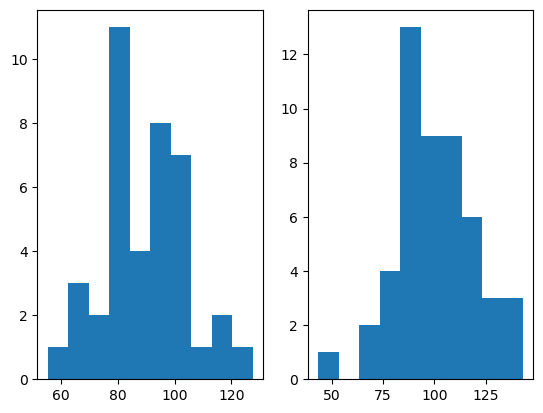

In [77]:
plt.subplot(121) # Just to plot histograms to verify normal(ish) distribution after putting values in np.random.normal()
plt.hist(office_1)

plt.subplot(122)
plt.hist(office_2)
plt.show()

In [78]:
office_1.var(), office_2.var() #Checking for whether variances are equal or different to set in 2-sample t test function

(227.997153290838, 366.52880217039694)

In [79]:
stats.levene(office_1, office_2) #Because p-value is so high, we will set equal_var equal to True (default, so no need to state explicitly)

LeveneResult(statistic=1.1562406173229618, pvalue=0.2851859313038022)

In [80]:
α = 0.05
ttest, p = stats.ttest_ind(office_1, office_2)

In [81]:
ttest, p

(-2.622578403136792, 0.010283679581180373)

In [82]:
if p > α:
    print('We fail to reject the null hypothesis')
else:
    print('We reject the null hypothesis')

We reject the null hypothesis


3. Load the mpg dataset and use it to answer the following questions:

In [33]:
from pydataset import data

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [39]:
mpg['avg_mileage'] = mpg[['cty','hwy']].mean(axis=1) #To compare fuel effiency in cars for following questions

In [ ]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

$H_0$: There is no difference in fuel-efficiency in cars from 2008 and 1999.

$H_\alpha$: There is a difference between the two.

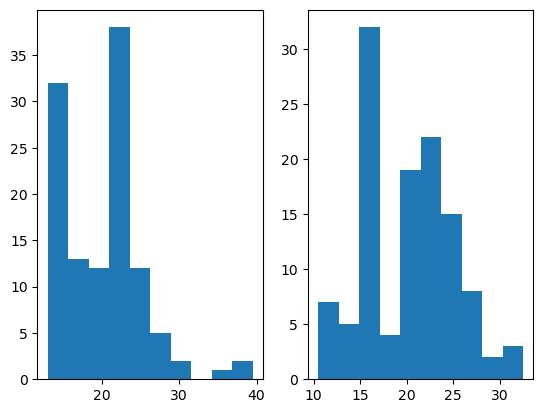

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)
1999    117
2008    117
Name: year, dtype: int64


In [68]:
# Several checks here. 
# 1) Check for normal-ish distribution.
# 2) Check value counts to ensure sample size above 30.
# 3) Check variance to determine whether I want to put equal_var = False to the above.

plt.subplot(121)
plt.hist(mpg.avg_mileage[mpg.year == 1999])
plt.subplot(122)
plt.hist(mpg.avg_mileage[mpg.year == 2008])
plt.show()

print(stats.levene((mpg.avg_mileage[mpg.year == 1999]),(mpg.avg_mileage[mpg.year == 2008])))
print(mpg.year.value_counts())

Because the p-value is greater than α, we'll put equal_var set to True (i.e. not put anything since True is default).

In [71]:
stats.ttest_ind((mpg.avg_mileage[mpg.year == 1999]),(mpg.avg_mileage[mpg.year == 2008]))

Ttest_indResult(statistic=0.21960177245940962, pvalue=0.8263744040323578)

Because the p-value is greater than .05, we fail to reject the null hypothesis.

I.e. there is no difference in fuel effciency between cars produced in 1998 vs. 2008.

In [83]:
# Are compact cars more fuel-efficient than the average car?

$H_0$: There is no difference in efficiency between compact cars and the average car.

$H_\alpha$: Compact cars are more fuel-efficient than the average car.

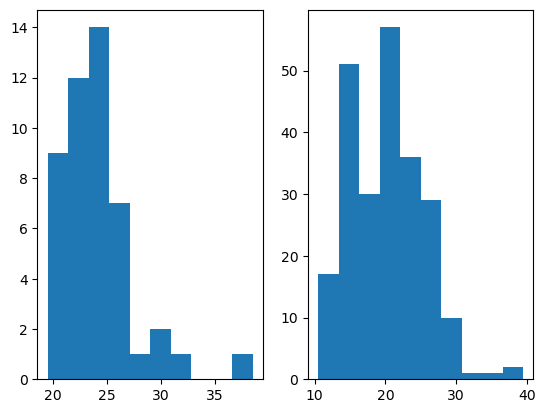

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64


In [75]:
# Same checks as above exccept for Levene test.

plt.subplot(121)
plt.hist(mpg.avg_mileage[mpg['class'] == 'compact'])
plt.subplot(122)
plt.hist(mpg.avg_mileage)
plt.show()

# No need for Levene test since it's a one-sample t-test
print(mpg['class'].value_counts())

In [74]:
#Because we're comparing to the average car, just one-sample t test is needed.

stats.ttest_1samp((mpg.avg_mileage[mpg['class'] == 'compact']), (mpg.avg_mileage).mean())

Ttest_1sampResult(statistic=7.896888573132533, pvalue=4.198563794317163e-10)

Because p-value is so low, we can reject the null hypothesis.

In [60]:
# Do manual cars get better gas mileage than automatic cars?

mpg['auto_man'] = np.where(mpg.trans.str.contains('auto'), 'auto', 'man')

#To get classes of transmission type

In [63]:
mpg.auto_man.value_counts() #to check if we can state if there are enough samples to assume normal distribution

auto    157
man      77
Name: auto_man, dtype: int64

In [85]:
stats.levene((mpg.avg_mileage[mpg.auto_man == 'man']),(mpg.avg_mileage[mpg.auto_man == 'auto'])) #equal_var is True

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [86]:
stats.ttest_ind((mpg.avg_mileage[mpg.auto_man == 'man']),(mpg.avg_mileage[mpg.auto_man == 'auto']))

Ttest_indResult(statistic=4.593437735750014, pvalue=7.154374401145683e-06)

Because we're looking at a "certain direction" (i.e. whether manual gets better/higher mpg than auto), we will check to see if p-value divided by two is less than the alpha. Since the p-value is lower than .025 (alpha is .05), then we can reject the null hypothesis.

# Correlation

1. Answer with the type of stats test you would use (assume normal distribution):

- Is there a relationship between the length of your arm and the length of your foot?
> Pearson test
- Do guys and gals quit their jobs at the same rate?
> Two-tailed 2-sample T-Test
- Does the length of time of the lecture correlate with a students grade?
> Pearson test

2. Use the telco_churn data.

In [ ]:
# Does tenure correlate with monthly charges?

In [2]:
# First, let's get the data using db url

from env import get_db_url 
url = get_db_url('telco_churn')

In [6]:
# Pull in the data needed. Filtered my query so all I get are the variables needed for all questions in this section.

telco = pd.read_sql('''SELECT tenure, monthly_charges, total_charges, phone_service, internet_service_type FROM customers
	LEFT JOIN internet_service_types USING(internet_service_type_id);''', url)
telco

,tenure,monthly_charges,total_charges,phone_service,internet_service_type
0,9,65.60,593.3,Yes,DSL
1,9,59.90,542.4,Yes,DSL
2,4,73.90,280.85,Yes,Fiber optic
3,13,98.00,1237.85,Yes,Fiber optic
4,3,83.90,267.4,Yes,Fiber optic
...,...,...,...,...,...
7038,13,55.15,742.9,Yes,DSL
7039,22,85.10,1873.7,Yes,Fiber optic
7040,2,50.30,92.75,Yes,DSL
7041,67,67.85,4627.65,Yes,DSL


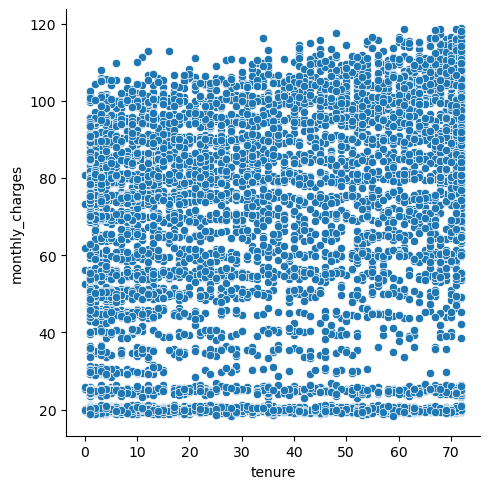

In [7]:
# Let's plot tenure with monthly charges just to take a look.

sns.relplot(data=telco, x='tenure', y='monthly_charges')

# Just looking at the plot, I'm going to say "no." We'll check using Pearson's test in the next cell.

In [8]:
r, p = stats.pearsonr(telco.tenure, telco.monthly_charges)
r, p

(0.24789985628615008, 4.0940449915016345e-99)

In [ ]:
# Given the above results, there is a weak correlation between tenure and monthly charges (r=0.24).

In [ ]:
# Total charges?

# To get this answer, we'll have to clean up our data first. Namely, adjusting our total_charges data to be a
# float-type object.

In [20]:
telco.total_charges = telco.total_charges.str.replace(' ', '0') 

# Before we can switch object to float, we had to make sure there were numerical values everywhere. In this case, 
# replacing space values with a 0.

In [21]:
telco.total_charges.sort_values() # Checking to make sure substitutions occurred.

2855         0
3118         0
3052         0
5433         0
1731         0
         ...  
5868    997.75
4298     998.1
4173    999.45
3162     999.8
6421     999.9
Name: total_charges, Length: 7043, dtype: object

In [34]:
telco.total_charges = telco.total_charges.astype(float) # Saving float type back to dataframe.

In [35]:
telco.info() # Checking that total_charges now reflects datatype of float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tenure                 7043 non-null   int64  
 1   monthly_charges        7043 non-null   float64
 2   total_charges          7043 non-null   float64
 3   phone_service          7043 non-null   object 
 4   internet_service_type  7043 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 275.2+ KB


In [36]:
# After all that, just need to change the second variable in the Pearson test.

r, p = stats.pearsonr(telco.tenure, telco.total_charges)
r, p

(0.826178397950242, 0.0)

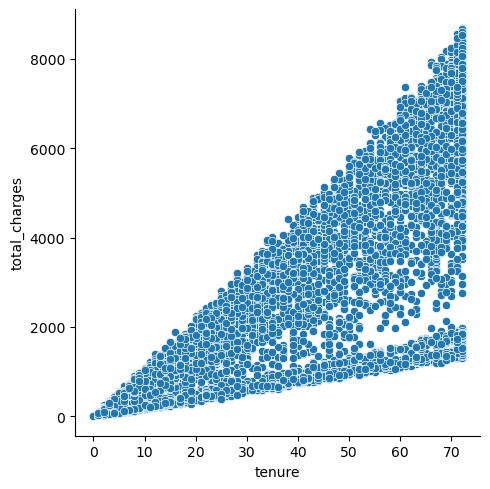

In [40]:
sns.relplot(data=telco, x='tenure', y='total_charges')

plt.show()

In [ ]:
# Looking at the results of the Pearson test and the graph, there is a strong correlation between tenure and 
# total_charges. This makes sense because total_charges are a compounded value, so the longer you're with the company,
# the more they will have charged you over time.

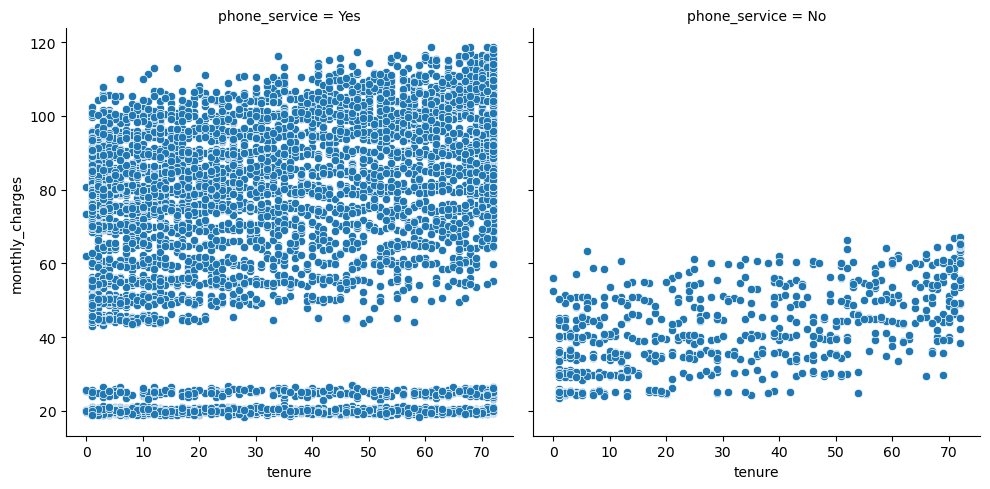

In [77]:
# What happens if you control for phone and internet service?

# I'm going to just look at phone_service Yes vs. No first, and only look at monthly_charges, since it's obvious that
# total_charges will increase with tenure since it is a compounded value.

sns.relplot(data=telco, x='tenure', y='monthly_charges', col='phone_service')

plt.show()

In [65]:
# Then, I'm going to run the Pearson test across the two.

stats.pearsonr(telco[telco.phone_service == 'Yes'].tenure, telco[telco.phone_service == 'Yes'].monthly_charges)

PearsonRResult(statistic=0.24538898585362875, pvalue=7.117871077967264e-88)

In [66]:
stats.pearsonr(telco[telco.phone_service == 'No'].tenure, telco[telco.phone_service == 'No'].monthly_charges)

PearsonRResult(statistic=0.5857597986661366, pvalue=4.603370347342836e-64)

In [64]:
# Looking at the above, there is a higher degree of correlation between monthly charges and those who don't have 
# phone service vs monthly charges and those who do have phone service.

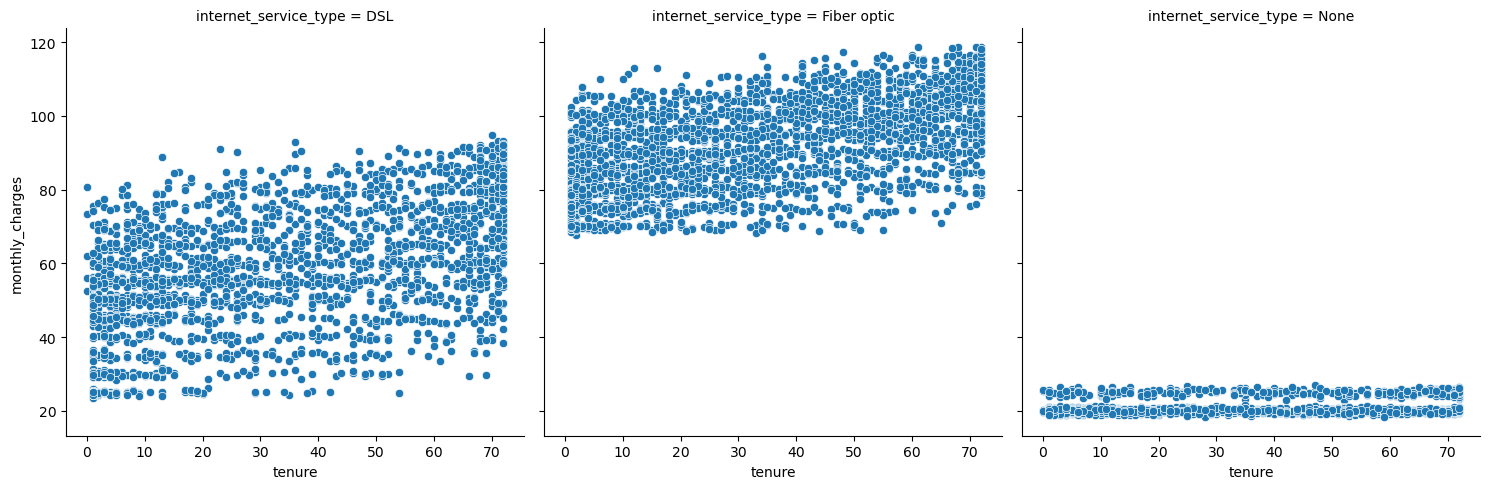

In [47]:
# Then, the way I interpreted the question, I'll look for correlations mong the three diff types of internet service.

sns.relplot(data=telco, x='tenure', y='monthly_charges', col='internet_service_type')

plt.show()

In [68]:
# Run the stats test across the three different kinds of internet service, tenure, and monthly_charges.

stats.pearsonr(telco[telco.internet_service_type == 'DSL'].tenure, telco[telco.internet_service_type == 'DSL'].monthly_charges)

PearsonRResult(statistic=0.5172828196602487, pvalue=8.360426862288436e-166)

In [69]:
stats.pearsonr(telco[telco.internet_service_type == 'Fiber optic'].tenure, telco[telco.internet_service_type == 'Fiber optic'].monthly_charges)

PearsonRResult(statistic=0.6246206176175583, pvalue=0.0)

In [70]:
stats.pearsonr(telco[telco.internet_service_type == 'None'].tenure, telco[telco.internet_service_type == 'None'].monthly_charges)

PearsonRResult(statistic=0.3423256230619446, pvalue=3.356186955197392e-43)

In [71]:
# Here, looking at the above results, those that have Fiber optic internet service have the strongest correlation (r=0.62),
# relatively speaking, between tenure and monthly charges, compared to those that have DSL (r=0.51) and None (r=0.34).

3. Use the employees database.

In [72]:
# Is there a relationship between how long an employee has been with the company and their salary?

employees_url = get_db_url('employees')

emp_sal_hours = pd.read_sql('''SELECT *, IF(to_date > NOW(), (YEAR('2002-08-31') - YEAR(hire_date)), (YEAR(to_date) - YEAR(hire_date))) AS tenure_years FROM employees
	JOIN salaries USING(emp_no)
    WHERE (emp_no, to_date) IN (SELECT emp_no, MAX(to_date) FROM salaries GROUP BY emp_no);
    ''', employees_url)

# In the select statement, YEAR of '2002-08-31' was chosen because that was the latest year (that was not 9999-01-01)
# that existed in the dataset. If YEAR(CURDATE()) had been chosen instead, a gap would have appeared in the plot.

In [73]:
emp_sal_hours.head(10)

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure_years
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,16
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,17
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,16
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,16
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,13
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,59755,2001-08-02,9999-01-01,13
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,88070,2002-02-07,9999-01-01,13
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15,52668,2000-03-10,2000-07-31,6
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18,94409,2002-02-14,9999-01-01,17
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,80324,2001-11-23,9999-01-01,13


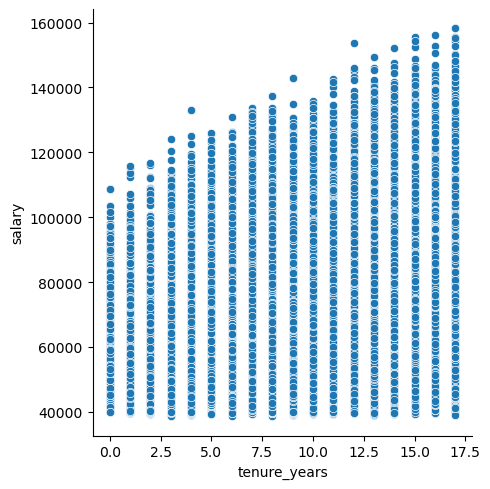

In [74]:
sns.relplot(data=emp_sal_hours, x='tenure_years', y='salary') # To see the data and verify no gaps are showing

plt.show()

In [75]:
stats.pearsonr(emp_sal_hours.tenure_years, emp_sal_hours.salary)

PearsonRResult(statistic=0.36774199951048614, pvalue=0.0)

In [ ]:
# Looking at the above, there is a correlation between tenure and salary, albeit a very weak one.

In [78]:
# Is there a relationship between how long an employee has been with the company and the number of titles they have had?

# Let's get the information we want to look at.

emp_title_years = pd.read_sql('''SELECT emp_no, title,  
	IF(to_date > NOW(), (YEAR('2002-08-31') - YEAR(hire_date)), (YEAR(to_date) - YEAR(hire_date))) AS tenure_years 
    FROM employees
	JOIN titles USING(emp_no)
    ;''', employees_url)

emp_title_years.head(10)

,emp_no,title,tenure_years
0,10001,Senior Engineer,16
1,10002,Staff,17
2,10003,Senior Engineer,16
3,10004,Engineer,9
4,10004,Senior Engineer,16
5,10005,Senior Staff,13
6,10005,Staff,7
7,10006,Senior Engineer,13
8,10007,Senior Staff,13
9,10007,Staff,7


In [115]:
emp_title_years_1 = pd.read_sql('''SELECT emp_no, MAX(tenure_years) AS ten, MAX(rn) AS maxrn FROM (
SELECT emp_no, title,  
	IF(to_date > NOW(), (YEAR('2002-08-31') - YEAR(hire_date)), (YEAR(to_date) - YEAR(hire_date))) AS tenure_years
    , row_number() over(partition by emp_no order by title) rn
    FROM employees
	JOIN titles USING(emp_no)) base
    GROUP BY emp_no
    ;''', employees_url)

emp_title_years_1.head(10)

,emp_no,ten,maxrn
0,10001,16,1
1,10002,17,1
2,10003,16,1
3,10004,16,2
4,10005,13,2
5,10006,13,1
6,10007,13,2
7,10008,6,1
8,10009,17,3
9,10010,13,1


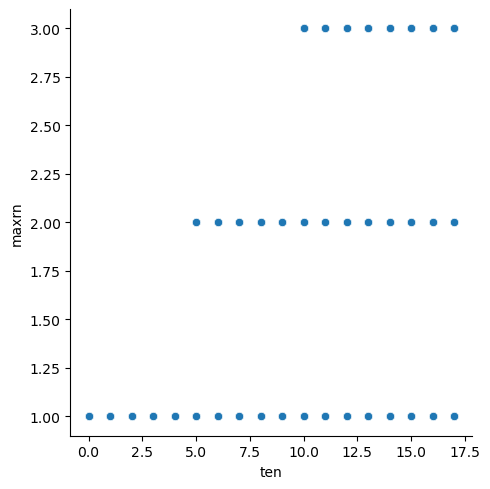

In [116]:
sns.relplot(data=emp_title_years_1, x='ten', y='maxrn')

plt.show()

In [118]:
stats.pearsonr(emp_title_years_1.ten, emp_title_years_1.maxrn)

stats.kruskal(emp_title_years_1.ten, emp_title_years_1.maxrn)

KruskalResult(statistic=434800.01603649935, pvalue=0.0)

In [ ]:
# According to the above, 

4. Use the sleepstudy data.

In [57]:
# Is there a relationship between days and reaction time?

from pydataset import data

sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


Set the hypotheses:
    
$H_0$: There is no relationship between days and reaction time.
        
$H_\alpha$: There is a relationship between days and reaction time.

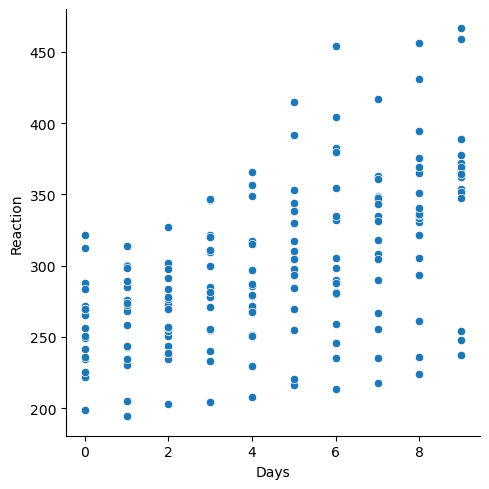

In [61]:
# Take a look at the data

sns.relplot(data=sleep, x='Days', y='Reaction')

plt.show()

In [121]:
# Run the stats test. Using Spearman since days are discrete but treated as continuous, and there's an even distribution
# for days.

stats.spearmanr(sleep.Days, sleep.Reaction)

SpearmanrResult(correlation=0.5228138502259547, pvalue=5.132878057706873e-14)

In [122]:
# We can say that there is a moderate correlation between Days and Reaction Time.

# Comparison of Groups

1. Answer with the type of stats test you would use (assume normal distribution):

- Do students get better test grades if they have a rubber duck on their desk?
> Assuming the grades are numerical, one-tailed two-sample T Test.
- Does smoking affect when or not someone has lung cancer?
> Chi^2 test.
- Is gender independent of a person’s blood type?
> Chi^2 test.
- A farming company wants to know if a new fertilizer has improved crop yield or not
> Two-sample one-tailed T Test.
- Does the length of time of the lecture correlate with a students grade?
> Assuming the grade is numerical, Pearson correlation test.
- Do people with dogs live in apartments more than people with cats?
> Chi^2 test.

2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

Codeup Student	Not Codeup Student

Uses a Macbook 49 20

Doesn't Use A Macbook 1 30

3. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

4. Use the data from the employees database to answer these questions:

In [ ]:
# Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [ ]:
# Is an employee's gender independent of whether or not they are or have been a manager?